In [1]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib
import matplotlib.pyplot as plt

In [48]:
path = 'C:/Users/JIHYEON/Documents/01.금형/03.python/data/haitian-kashui_13.xlsx'
kashui = pd.read_excel(path)

In [49]:
x = kashui.iloc[:,1:-3]
y = kashui.iloc[:,:-1]
x_arr = np.array(x)

In [6]:
# k-means label
# y = pd.Series(np.load('./result/kashui_kmeans_label.npy'))

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
x_scaler = StandardScaler().fit_transform(x_arr)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaler,y,test_size=0.3,random_state=4)

In [71]:
h=1
w=12
x_train = np.reshape(X_train,(len(X_train),h,w,1))
x_test = np.reshape(X_test,(len(X_test),h,w,1))

In [72]:
np.shape(x_train)

(210, 1, 12, 1)

In [73]:
np.shape(x_test)

(90, 1, 12, 1)

In [98]:
from keras.layers import Input, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
input_img = Input(shape=(h, w, 1)) # 1ch=black&white, 224 x 224

chanuel1 = 4
chanuel2 = 2

In [103]:
x = Convolution2D(chanuel1, 1, 3, activation='relu', border_mode='same')(input_img) #nb_filter, nb_row, nb_col
print(np.shape(x))

x = MaxPooling2D((1, 2), border_mode='same')(x)
print(np.shape(x))

x = Convolution2D(chanuel2, 1, 2, activation='relu', border_mode='same')(x)
print(np.shape(x))

x = MaxPooling2D((1, 2), border_mode='same')(x)
print(np.shape(x))

x = Convolution2D(1, 1, 2, activation='sigmoid', border_mode='same')(x)
print(np.shape(x))

encoded = MaxPooling2D((1, 2), border_mode='same')(x)
print(np.shape(encoded))

(?, 1, 12, 4)
(?, 1, 6, 4)
(?, 1, 6, 2)
(?, 1, 3, 2)
(?, 1, 3, 1)
(?, 1, 2, 1)


C:\Users\JIHYEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (1, 3), activation="relu", padding="same")`
  """Entry point for launching an IPython kernel.
C:\Users\JIHYEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((1, 2), padding="same")`
  after removing the cwd from sys.path.
C:\Users\JIHYEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2, (1, 2), activation="relu", padding="same")`
  import sys
C:\Users\JIHYEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((1, 2), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\JIHYEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 A

In [104]:
x = Convolution2D(chanuel2, 1, 2, activation='relu', border_mode='same')(encoded)
print(np.shape(x))

x = UpSampling2D((1, 3))(x)
print(np.shape(x))

x = Convolution2D(chanuel1, 1, 2, activation='relu', border_mode='same')(x)
print(np.shape(x))

x = UpSampling2D((1, 1))(x)
print(np.shape(x))

x = Convolution2D(1, 1, 2, activation='relu', border_mode='same')(x)
print(np.shape(x))

x = UpSampling2D((1, 2))(x)
print(np.shape(x))

decoded = Convolution2D(1, 1, 3, activation='sigmoid', border_mode='same')(x)
print(np.shape(x))

(?, 1, 2, 2)
(?, 1, 6, 2)
(?, 1, 6, 4)
(?, 1, 6, 4)
(?, 1, 6, 1)
(?, 1, 12, 1)
(?, 1, 12, 1)


C:\Users\JIHYEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2, (1, 2), activation="relu", padding="same")`
  """Entry point for launching an IPython kernel.
C:\Users\JIHYEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (1, 2), activation="relu", padding="same")`
  import sys
C:\Users\JIHYEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (1, 2), activation="relu", padding="same")`
  del sys.path[0]
C:\Users\JIHYEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (1, 3), activation="sigmoid", padding="same")`


In [105]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


autoencoder.fit(x_train, x_train, nb_epoch= 50, batch_size=3,             # nb_epoch 높으면 오래걸리니까 일단 2 나중에 50
               shuffle=True, validation_data=(x_test, x_test), verbose=1) 

C:\Users\JIHYEON\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 210 samples, validate on 90 samples
Epoch 1/50
210/210 [==============================] - 2s 8ms/step - loss: 0.6768 - val_loss: 0.6571
Epoch 2/50
210/210 [==============================] - 0s 1ms/step - loss: 0.6425 - val_loss: 0.6203
Epoch 3/50
210/210 [==============================] - 0s 1ms/step - loss: 0.6082 - val_loss: 0.5837
Epoch 4/50
210/210 [==============================] - ETA: 0s - loss: 0.581 - 0s 1ms/step - loss: 0.5747 - val_loss: 0.5483
Epoch 5/50
210/210 [==============================] - 0s 1ms/step - loss: 0.5424 - val_loss: 0.5143
Epoch 6/50
210/210 [==============================] - 0s 1ms/step - loss: 0.5121 - val_loss: 0.4829
Epoch 7/50
210/210 [==============================] - 0s 1ms/step - loss: 0.4843 - val_loss: 0.4538
Epoch 8/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4582 - val_loss: 0.4260
Epoch 9/50
210/210 [==============================] - 0s 1ms/step - loss: 0.4335 - val_loss: 0.3999
Epoch 10/50
210/210 [==========

In [89]:
encoder = Model(input_img, encoded)
encoder.compile(optimizer='adadelta', loss='binary_crossentropy')
# encoder.save('./result/encoder.h5')

enco_train_pred = encoder.predict(x_train)
enco_test_pred = encoder.predict(x_test)

enco_train_re = np.reshape(enco_train_pred,(len(enco_train_pred),2))
enco_test_re = np.reshape(enco_test_pred,(len(enco_test_pred),2))
enco_merge = np.concatenate((enco_train_re,enco_test_re), axis = 0)

X_reduce = pd.DataFrame()
X_reduce['x'] = [enco_merge[x][0] for x in range(0,len(enco_merge))]
X_reduce['y'] = [enco_merge[x][1] for x in range(0,len(enco_merge))]

In [ ]:
# 상무님 라벨

# true label
y = kashui.iloc[:,-1]

label1 = 1
label2 = 2
label3 = 3

# 전체
plt.title("all score")
# plt.xlim(-0.65, -0.3)
# plt.ylim(-3.5, -0.5)

b1 = plt.scatter(X_reduce['x'], X_reduce['y'], c='green',s=20)

plt.show()

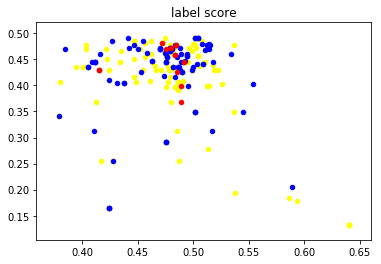

In [137]:
# 라벨별
idx_1 = y[y == label1 ].index.tolist()
idx_2 = y[y == label2 ].index.tolist()
idx_3 = y[y == label3 ].index.tolist()

plt.title("label score")
# plt.xlim(-0.65, -0.3)
# plt.ylim(-3.5, -0.5)

b1 = plt.scatter(X_reduce.iloc[idx_1,0], X_reduce.iloc[idx_1,1], c='yellow',s=20)
b1 = plt.scatter(X_reduce.iloc[idx_2,0], X_reduce.iloc[idx_2,1], c='blue',s=20)
b1 = plt.scatter(X_reduce.iloc[idx_3,0], X_reduce.iloc[idx_3,1], c='red',s=20)

plt.show()

In [ ]:
# k-means 라벨

# true label
y = pd.Series(np.load('./result/kashui_kmeans_label.npy'))

label1 = 0
label2 = 1
label3 = 2

# 라벨별
idx_1 = y[y == label1 ].index.tolist()
idx_2 = y[y == label2 ].index.tolist()
idx_3 = y[y == label3 ].index.tolist()

plt.title("label score")
# plt.xlim(-0.65, -0.3)
# plt.ylim(-3.5, -0.5)

b1 = plt.scatter(X_reduce.iloc[idx_1,0], X_reduce.iloc[idx_1,1], c='yellow',s=20)
b1 = plt.scatter(X_reduce.iloc[idx_2,0], X_reduce.iloc[idx_2,1], c='blue',s=20)
b1 = plt.scatter(X_reduce.iloc[idx_3,0], X_reduce.iloc[idx_3,1], c='red',s=20)

plt.show()